In [ ]:
%pip install scikit-learn

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('mushrooms.csv')
labels_encoder = {}
df_encoded = df.copy()
for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    labels_encoder[column] = le

# Separar caracteristcas X y Y
X = df_encoded.drop("class", axis=1)
Y = df_encoded["class"]

#Dividir datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)# En el tamaño de la muestra es recomendable entre 20% y 30%

model=LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

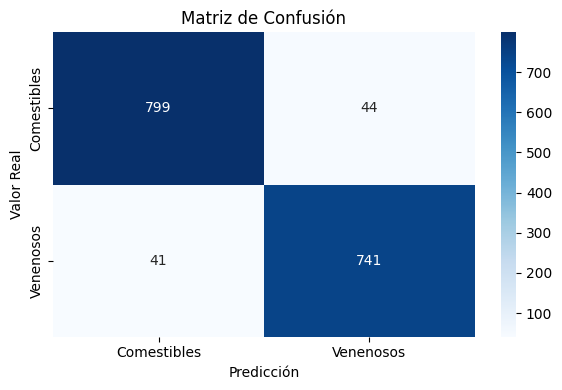

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Comestibles", "Venenosos"], yticklabels=["Comestibles", "Venenosos"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

El MSE es 0.5124717232649135
El R2 es 0.605519047477012


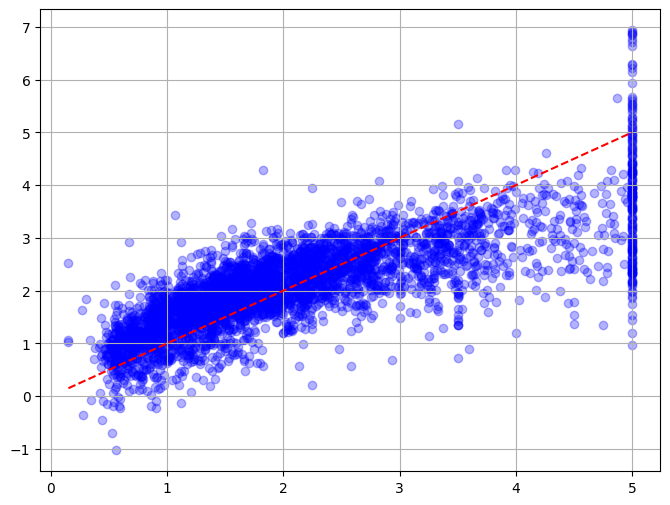

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#Cargar el dataset

data=fetch_california_housing()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target#Cual es el objetivo
#Dividir  los datos en entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
# Crear el modelo y lo entrenamos
model=LinearRegression()
model.fit(X_train,y_train)
#Evaluar el modelo
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("El MSE es",mse)
print("El R2 es", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()